# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Выведем первые 5 строк

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv')
df.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видим, что данные разделяются не запятыми. Изменим параметр sep
и выведем несколько строк датафрейма

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Выведем процент пропусков от общего количетсва строк

In [4]:
print(df.isna().mean()*100)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64


### Вывод

Видим, что в некоторых столбцах много пустых значений. Так же есть некорректные типы данных. Рассмотрим далее каждый столбец c пропусками по отдельности. Уберем дубликаты

## Предобработка данных

Теперь рассмотрим все столбцы с пропусками по отдельности

ceiling_height Очень много пропусков, удалять и менять нельзя. Оставим как есть

floors_total Очень мало пропусков, поэтому просто удалим строки с этими пропусками.

In [6]:
df.dropna(subset=['floors_total'], inplace=True)

living_area Заполним пустые значения исходя из общей площади квартиры. Создадим новый параметр и функцию, которая будет заменять пустые значения на основе нового параметра.

In [7]:
area_category = ['маленькая площадь', 'средняя площадь', 'большая площадь', 'огромная площадь']
df['area_group'] = pd.qcut(df['total_area'], q=4, labels=area_category)
print(df['area_group'].value_counts())

маленькая площадь    6013
средняя площадь      5905
огромная площадь     5900
большая площадь      5795
Name: area_group, dtype: int64


In [8]:
def no_null(data, value, category):
    for value_unique in data[value].unique():
        data.loc[(data[category].isna()) & (data[value] == value_unique), category] = data.loc[data[value] == value_unique, category].median()
    return data

In [9]:
no_null(df, 'area_group', 'living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,огромная площадь
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,средняя площадь
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,большая площадь
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,51.35,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,огромная площадь
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,огромная площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,огромная площадь
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,большая площадь
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,большая площадь
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,51.35,12,NaN,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,огромная площадь


is_apartment Оставим так как есть, слишком много пропущенных значений.

In [10]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)

In [11]:
print(len(df[df['is_apartment'].isna()]))

0


In [12]:
print(df['is_apartment'].value_counts())

False    23563
True        50
Name: is_apartment, dtype: int64


kitchen_area Не так много пропущенных значений. Но у нас уже есть подходящяя функция, которая заменит значения

In [13]:
no_null(df, 'area_group', 'kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,огромная площадь
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,средняя площадь
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,большая площадь
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,51.35,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,огромная площадь
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,огромная площадь
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,огромная площадь
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,большая площадь
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,большая площадь
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,51.35,12,False,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,огромная площадь


balcony Много пропущенных значений. Заменим пустые значения на ноль, так как скорее всего там где не указано их просто нет

In [14]:
df.loc[df['balcony'].isna(), 'balcony'] = 0

locality_name Очень мало пропусков, просто удалим их

In [15]:
df.dropna(subset=['locality_name'], inplace=True)

In [16]:
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Видим, что многие одинаковые населенные пукнты записаны по разному. С помощью функции split разделим слова в строке и оставим только названия населенных пунктов.

In [17]:
df['split_name'] = df['locality_name'].str.split()

In [18]:
def change_name(split_n):
    for i in split_n:
        if i.istitle():
            return i

In [19]:
df['locality_name'] = df['split_name'].apply(change_name)

In [20]:
len(df[df['locality_name'].isna()])

0

parks_around3000 Предположим, что отсутствие значений указывает на то, что рядом парков нет. Заменим отсутствующие значения на 0

In [23]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)

parks_nearest Заменим пустые значение согласно количеству парков в зоне 3км.

In [24]:
print(df.groupby('parks_around3000')['parks_nearest'].median())

parks_around3000
0.0    3127.0
1.0     501.0
2.0     366.0
3.0     307.0
Name: parks_nearest, dtype: float64


In [25]:
no_null(df, 'parks_around3000', 'parks_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,split_name
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,огромная площадь,[Санкт-Петербург]
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,Шушары,12817.0,18603.0,0.0,3127.0,0.0,NaN,81.0,средняя площадь,"[посёлок, Шушары]"
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,большая площадь,[Санкт-Петербург]
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,51.35,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,огромная площадь,[Санкт-Петербург]
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,огромная площадь,[Санкт-Петербург]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,огромная площадь,[Санкт-Петербург]
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,Тосно,NaN,NaN,0.0,3127.0,NaN,NaN,45.0,большая площадь,[Тосно]
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,Рождествено,NaN,NaN,0.0,3127.0,NaN,NaN,NaN,большая площадь,"[село, Рождествено]"
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,51.35,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,огромная площадь,[Санкт-Петербург]


ponds_around3000 Предположим, что отсутствие значений указывает на то, что рядом водоемов нет. Заменим отсутствующие значения на 0

In [26]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

ponds_nearest Заменим пустые значение согласно количеству водоемов в зоне 3км.

In [27]:
print(df.groupby('ponds_around3000')['ponds_nearest'].median())

ponds_around3000
0.0      NaN
1.0    594.0
2.0    436.0
3.0    305.0
Name: ponds_nearest, dtype: float64


Видим, что нет ни одного значения с количеством водоемов 0, поэтому логично заменим на 3100 метров. 

In [28]:
df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around3000'] == 0), 'ponds_nearest'] = 3100

In [29]:
no_null(df, 'ponds_around3000', 'ponds_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_group,split_name
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,огромная площадь,[Санкт-Петербург]
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,Шушары,12817.0,18603.0,0.0,3127.0,0.0,3100.0,81.0,средняя площадь,"[посёлок, Шушары]"
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,большая площадь,[Санкт-Петербург]
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,51.35,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,огромная площадь,[Санкт-Петербург]
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,огромная площадь,[Санкт-Петербург]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,огромная площадь,[Санкт-Петербург]
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,Тосно,NaN,NaN,0.0,3127.0,0.0,3100.0,45.0,большая площадь,[Тосно]
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,Рождествено,NaN,NaN,0.0,3127.0,0.0,3100.0,NaN,большая площадь,"[село, Рождествено]"
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,51.35,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,огромная площадь,[Санкт-Петербург]


In [30]:
print(len(df[df['days_exposition'].isna()]))

3171


days_exposition Много пропусков, создадим новый параметр по цене. Так как чем меньше цена, тем быстрее продается квартира. Проверим это

In [31]:
df['last_price'].corr(df['days_exposition'])

0.08085787333660648

Видим, что зависимости нет. Стоит предположить, что эти объявления еще не сняты с публикации

Зная, что бесплатные публикации действительны до 90 дней, посмотрим сколько из них опубликованы в последние 3 месяца.

In [32]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

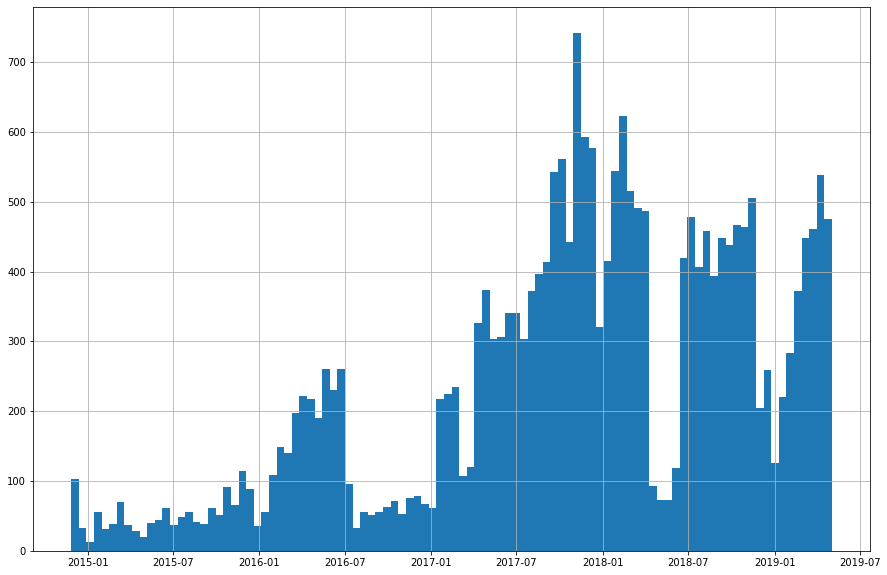

In [33]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

_ = df['first_day_exposition'].hist(figsize=(15,10),bins=100)

In [34]:
df['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

In [35]:
len(df.loc[(df['first_day_exposition'] > '2019-02-03 00:00:00') & (df['days_exposition'].isna())])

1636

Половина опубликована в последние 3 месяца, а остльные предположим, что продливали объявления платно.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           23565 non-null float64
ponds_a

Теперь переведем все данные к нужному формату

In [39]:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
df['days_exposition'] = df['days_exposition'].round().astype('Int64')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          14481 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000 

In [41]:
print(df.isna().sum()/len(df)*100)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.548695
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.441545
cityCenters_nearest     23.343942
parks_around3000         0.000000
parks_nearest            0.000000
ponds_around3000         0.000000
ponds_nearest            0.000000
days_exposition         13.456397
area_group               0.000000
split_name               0.000000
dtype: float64


### Вывод

Данные очень плохие, где было возможно подставил значение логически. Количестов пропусков значительно сократилась. Перевел все к боллее простому и понятному типу данных. Пропуски данных могли возникнуть или при сокрытии этой информации от клиентов или при неправильной выгрузке данных

## Расчёты и добавление результатов в таблицу

Добавим новый столбец с ценой квадратного метра

In [42]:
df['price_meter'] = df['last_price']/df['total_area']

Добавим день недели, месяц и год публикации

In [43]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [44]:
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [45]:
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

Добавим этаж квартиры, создадим функцию и с помощью apply axis=1 пройдемся по всем строкам

In [46]:
def new_floor (data):
    floor = data['floor']
    total = data['floors_total']             
    if floor == total:
        return 'Последний'
    if floor == 1:
        return 'Первый'
    else:
        return 'Другой'

In [47]:
df['floors_group'] = df.apply(new_floor, axis=1)

Создадим столбец с соотношением жилой и общей площади кваритиры

In [48]:
df['living_total_area'] = df['living_area']/df['total_area']

Создадим столбец с соотношением площади кухни и общей площади кваритиры

In [49]:
df['kitchen_total_area'] = df['kitchen_area']/df['total_area']

## Исследовательский анализ данных

Построим гистограммы для площади, цены, числа комнат и высоты потолков

In [50]:
!pip install matplotlib==3.4.2

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 1.0 MB/s eta 0:00:01    |███████▍                        | 2.4 MB 1.0 MB/s eta 0:00:08


In [51]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.1.0'

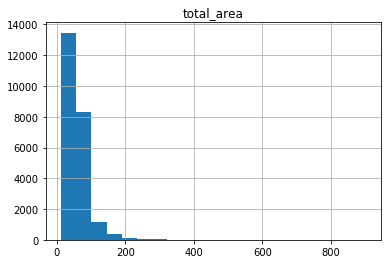

In [52]:
df['total_area'].hist(bins=20).set_title('total_area')
plt.show()

Видим, что примерно после 300 очень мало значений. отбросим их с помощью query

In [53]:
new_df = df.query('total_area < 300')

Видим, что в основном продаютс квартиры с площадью 50 метров. Больше 150 метров уже очень мало

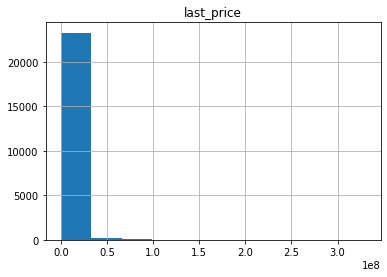

In [54]:
new_df['last_price'].hist(bins=10).set_title('last_price')
plt.show()

Убрем значения болльше 50 млн

In [55]:
new_df = new_df.query('last_price < 50000000')

В основном квариры стоят до 10 млн рублей. Дороже 25 млн очень мало

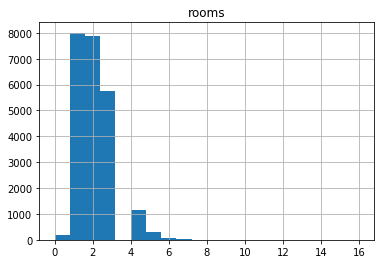

In [56]:
new_df['rooms'].hist(bins=20).set_title('rooms')
plt.show()

Больше 8 комнат пракически нет. Уберем все, что выше.

In [57]:
new_df = new_df.query('rooms <= 8')

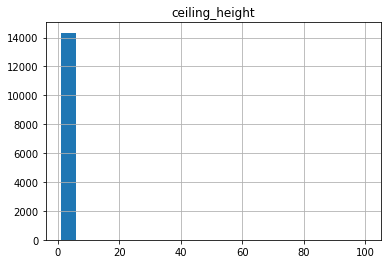

In [58]:
new_df['ceiling_height'].hist(bins=20).set_title('ceiling_height')
plt.show()

Есть какие то выбросы. Болше 4 метров значений не должно быть, так же уберем параметры меньше 2 метров. Уберем лишнее

In [59]:
new_df = new_df.query('ceiling_height <= 4')

In [60]:
new_df = new_df.query('ceiling_height >= 2')

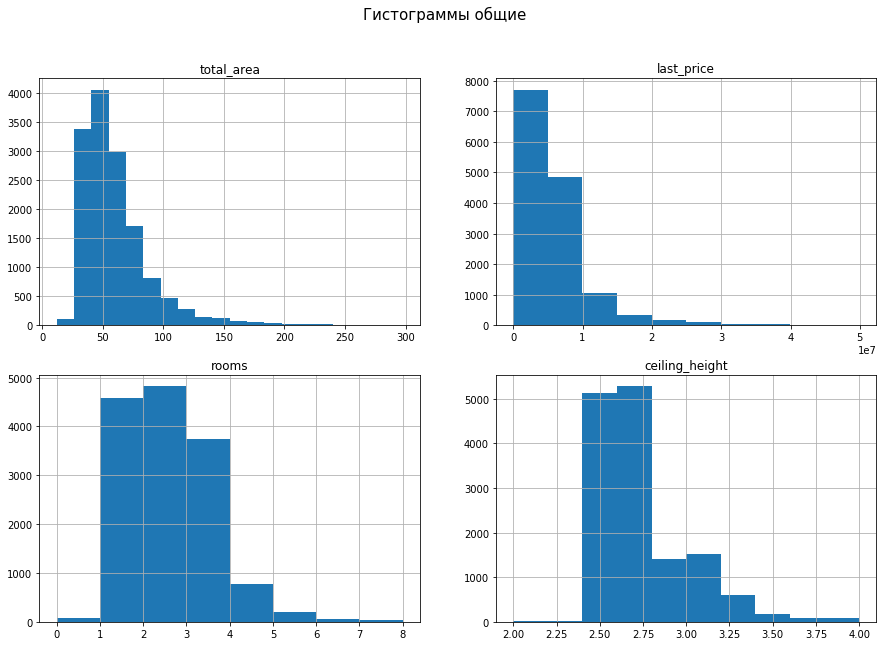

In [61]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Гистограммы общие', fontsize=15)
h1 = plt.subplot(2, 2, 1).set_title('total_area')
h1 = new_df['total_area'].hist(bins=20)
h2 = plt.subplot(2, 2, 2).set_title('last_price')
h2 = new_df['last_price'].hist(bins=10)
h3 = plt.subplot(2, 2, 3).set_title('rooms')
h3 = new_df['rooms'].hist(bins=8)
h4 = plt.subplot(2, 2, 4).set_title('ceiling_height')
h4 = new_df['ceiling_height'].hist(bins=10)
plt.show()

Видим, что в основном продаютс квартиры с площадью 50 метров. Больше 150 метров уже очень мало.
В основном квариры стоят до 10 млн рублей. Дороже 25 млн очень мало.
Больше всего квратир от онлой до 4 комнат.
В основном продаются квартиры с высотой 2.5 - 2.8 метров.

Изучим данные по времени продажи кваритр. Для начала построим гистограмму

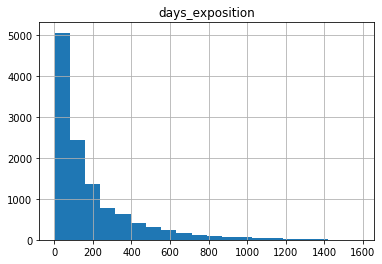

In [62]:
new_df['days_exposition'].hist(bins=20).set_title('days_exposition')
plt.show()

Больше 1200 дней пракически нет, но посмотрим на диаграмму размаха

In [63]:
new_df = new_df.query('days_exposition < 1200')

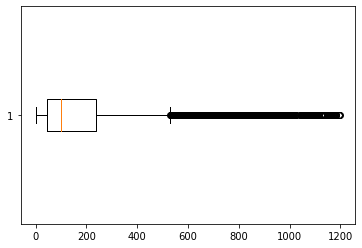

In [64]:
plt.boxplot('days_exposition', data=new_df, vert=False)
plt.show()

Мы видим, что больше 500 дней уже очень мало и идут одни выбросы. Поэтому удалим эти значения

In [65]:
new_df = new_df.query('days_exposition < 500')


In [66]:
print(new_df['days_exposition'].median())
print(new_df['days_exposition'].mean())

89.0
129.9328940040839


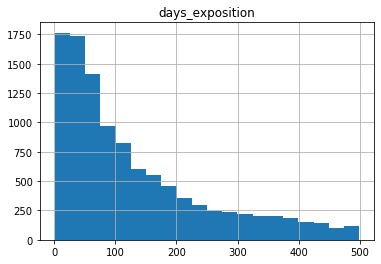

In [67]:
new_df['days_exposition'].hist(bins=20).set_title('days_exposition')
plt.show()

Предлагаю считать первый квартиль очень быстрыми продажами, а четвертый квартиль очень медленными. Для этого вызовем метод describe

In [68]:
new_df['days_exposition'].describe()

count    10774.000000
mean       129.932894
std        120.216006
min          1.000000
25%         41.000000
50%         89.000000
75%        187.000000
max        499.000000
Name: days_exposition, dtype: float64

Если квартира продана меньше чем за 41 день, то это быстрая продажа. Если больше чем за 180, то это долгая продажа. Медиана 89 дня, а среднее арфиметической 129

In [69]:
new_df['last_price'].describe()

count    1.077400e+04
mean     5.769080e+06
std      4.333108e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.600000e+06
75%      6.500000e+06
max      4.990000e+07
Name: last_price, dtype: float64

Изучим как цена зависит от площади, количества комнат, удаленности от центра, этажа и даты размещения. Узнаем корреляцию

In [70]:
print(new_df['last_price'].corr(new_df['total_area']))

0.7827116708561788


Корреляция между ценой и площадью равняется 0,78. Это значит, что цена и площадь очень сильно зависят между собой. Чем больше площадь, тем дороже квартира.

In [71]:
print(new_df['last_price'].corr(new_df['rooms']))

0.4985051324670116


Корреляция между ценой и площадью равняется 0,49. Это значит, что цена и количество комнат зависят друг от тдруга, но не сильно. 

Далее более правильно будет изучать цены за метр

In [72]:
print(new_df['price_meter'].corr(new_df['cityCenters_nearest']))

-0.37517630264348084


Корреляция между ценой и расстоянием до центра равняется -0,37. Это значит, что чем выше цена, тем больше расстояние до центра, но зависимость не особо сильная

Далее построим график, по которму увидим медиану цен для разных категорий этажей

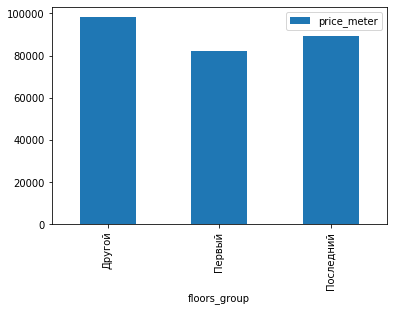

In [73]:
new_df.pivot_table(index='floors_group', values='price_meter', aggfunc='median').plot(kind='bar')
plt.show()

Видим, что квартиры на первом этаже дешевле всего, чуть дороже на последнем, а все остальные самые дорогие

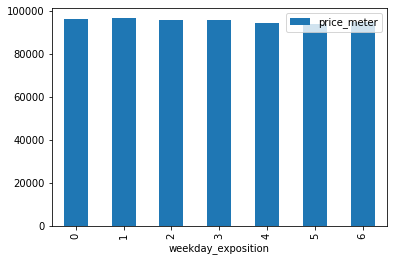

In [74]:
new_df.pivot_table(index=('weekday_exposition'), values='price_meter', aggfunc='median').plot(kind='bar')
plt.show()

По графику видим, что разницы в какой день размещено объявление нет. Чтобы убедиться в этом проверим корреляцию

In [75]:
print(new_df['weekday_exposition'].corr(new_df['price_meter']))

-0.008711196937451787


Действительно нет разницы в какой день было загружено объявление

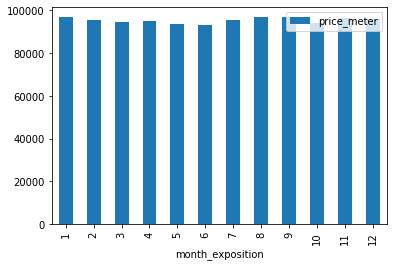

In [76]:
new_df.pivot_table(index=('month_exposition'), values='price_meter', aggfunc='median').plot(kind='bar')
plt.show()

Видим, что есть небольшая разница в размещении в разные месяцы. В мае, июне и июле цены на квартиры чуть меньше

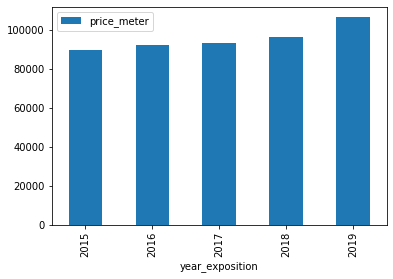

In [77]:
new_df.pivot_table(index=('year_exposition'), values='price_meter', aggfunc='median').plot(kind='bar')
plt.show()

В целом видим, что цены с каждым годом минимально растут.

Далее изучим 10 населенных пунктов с наибольшим числом объявлений. Найдем самые популярные с помощью value_counts,  а затем создадим новый датафрейм по этим населенным пунктам

In [78]:
top10 = new_df['locality_name'].value_counts().head(10)

In [79]:
top10_data = new_df.query('locality_name in @top10.index')

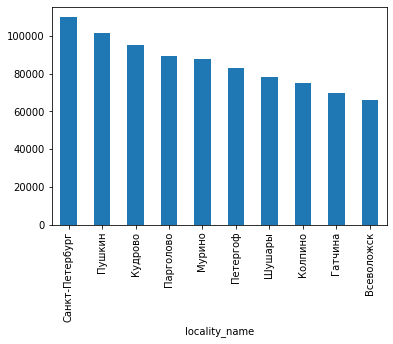

In [80]:
top10_data.groupby('locality_name')['price_meter'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

Из списка самых популярных городов, самые дорогие квартиры в Санкт-Петербурге, а самые дешевые в Всеволожске

Теперь исследуем цены в Санкт_Петербурге. Создадим новый датафрейм, а затем сгрпируем по расстоянию и средней цене на каждом километра от центра

In [81]:
spb = new_df.query('locality_name == "Санкт-Петербург"')

In [82]:
spb['cityCenters_nearest'].dropna()

4         8098.0
9        15008.0
10       13878.0
16       10698.0
18       10842.0
          ...   
23673    11881.0
23681     7262.0
23686    11602.0
23688    14428.0
23689    16081.0
Name: cityCenters_nearest, Length: 7494, dtype: float64

In [83]:
spb['center_nearest_km'] = (spb['cityCenters_nearest']/1000).round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


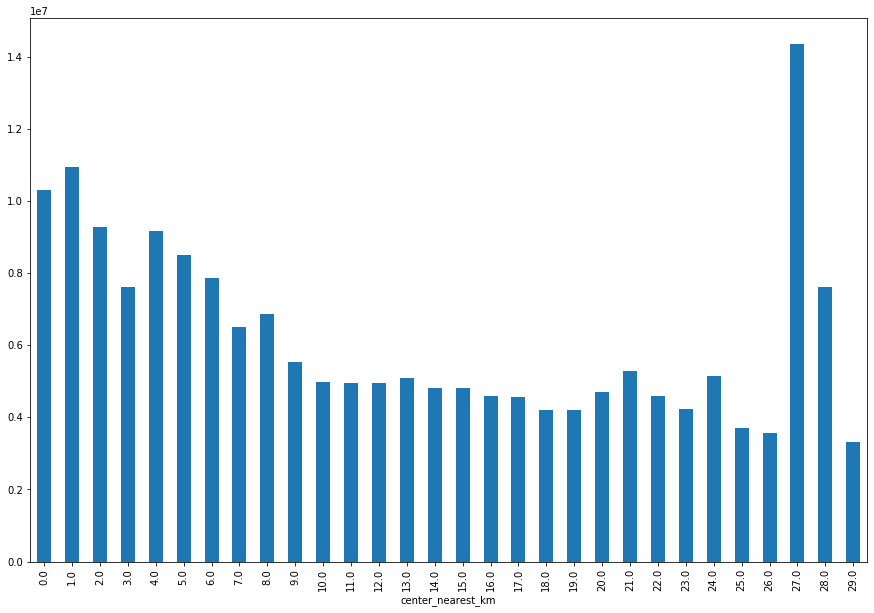

In [84]:
spb.groupby('center_nearest_km')['last_price'].median().plot(kind='bar', figsize=(15, 10))
plt.show()

Изучим почему на 27 километрах от центра такой скачок в ценах

In [85]:
display(spb.loc[spb['center_nearest_km'] == 27])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,area_group,split_name,price_meter,weekday_exposition,month_exposition,year_exposition,floors_group,living_total_area,kitchen_total_area,center_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,огромная площадь,[Санкт-Петербург],193918.918919,1,11,2017,Другой,0.405405,0.337838,27.0


Видим, что всего 1 квартира здесь и она очень дорогая, с высокими потолками

Глядя на график можно определить, что центральная зона города расположена в радиусе 8 км от центра

In [86]:
spb_center = spb.query('center_nearest_km <= 8')

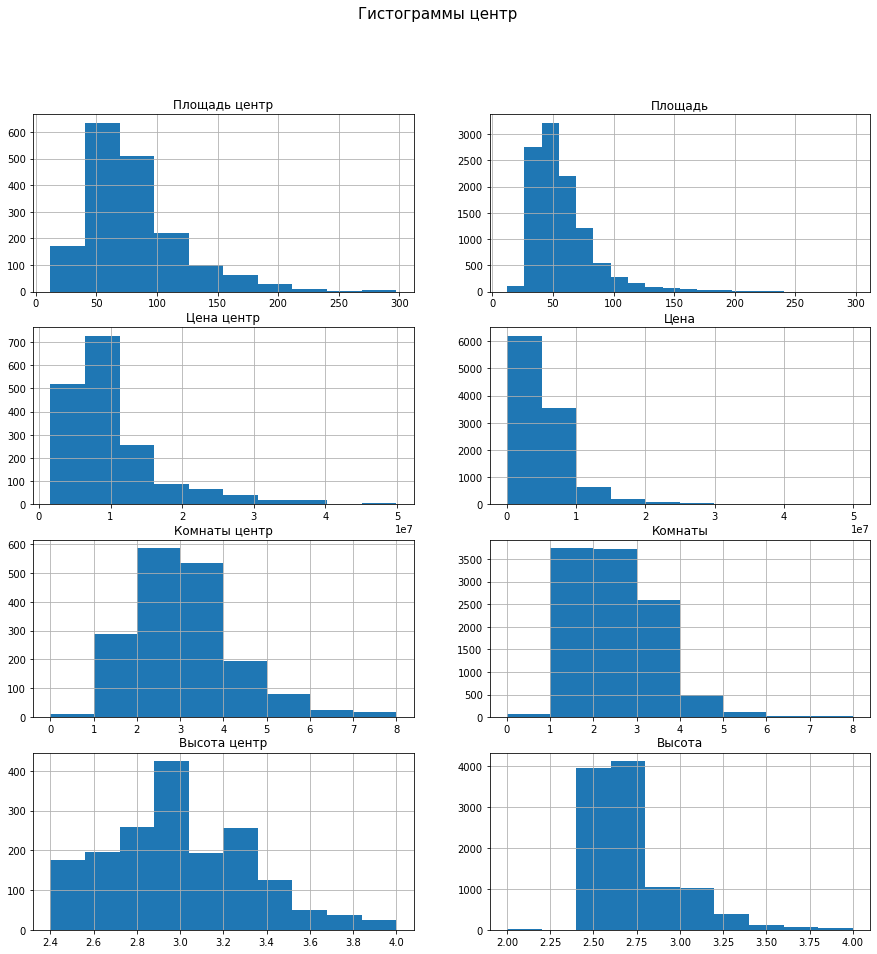

In [87]:
fig1 = plt.figure(figsize=(15, 15))
fig1.suptitle('Гистограммы центр', fontsize=15)
s1 = plt.subplot(4, 2, 1).set_title('Площадь центр')
s1 = spb_center['total_area'].hist(bins=10)
s2 = plt.subplot(4, 2, 3).set_title('Цена центр')
s2 = spb_center['last_price'].hist(bins=10)
s3 = plt.subplot(4, 2, 5).set_title('Комнаты центр')
s3 = spb_center['rooms'].hist(bins=8)
s4 = plt.subplot(4, 2, 7).set_title('Высота центр')
s4 = spb_center['ceiling_height'].hist(bins=10)

h1 = plt.subplot(4, 2, 2).set_title('Площадь')
h1 = new_df['total_area'].hist(bins=20)
h2 = plt.subplot(4, 2, 4).set_title('Цена')
h2 = new_df['last_price'].hist(bins=10)
h3 = plt.subplot(4, 2, 6).set_title('Комнаты')
h3 = new_df['rooms'].hist(bins=8)
h4 = plt.subplot(4, 2, 8).set_title('Высота')
h4 = new_df['ceiling_height'].hist(bins=10)
plt.show()

В центре в основном продаются квартиры с площадью от 40 до 100 метров, сбольшей площадью продаются уже меньше.Средняя цена до 10 млн. Самые популярные в количестве комнат это 2-3, 1-4 продаётся чуть меньше. Высота в основном от 2,8 до 3 метров

В сравнении с общими показателями, в центре квартиры чуть большей площади. Цены в центре естественно выше и потолки выше

In [88]:
print(spb_center['last_price'].corr(spb_center['rooms']))

0.47825004644132135


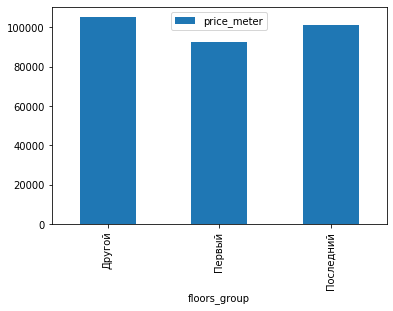

In [89]:
spb.pivot_table(index='floors_group', values='price_meter', aggfunc='median').plot(kind='bar')

In [90]:
print(spb['price_meter'].corr(spb['cityCenters_nearest']))

-0.3372175132768157


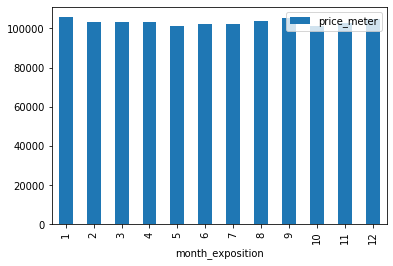

In [91]:
spb.pivot_table(index=('month_exposition'), values='price_meter', aggfunc='median').plot(kind='bar')
plt.show()

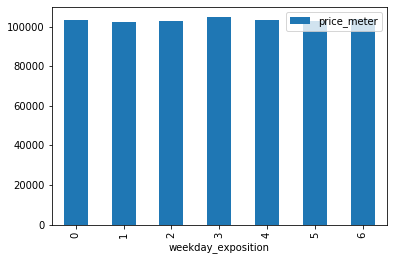

In [92]:
spb.pivot_table(index=('weekday_exposition'), values='price_meter', aggfunc='median').plot(kind='bar')
plt.show()

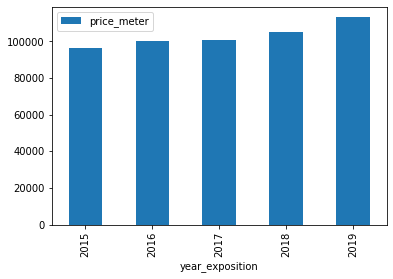

In [135]:
spb.pivot_table(index=('year_exposition'), values='price_meter', aggfunc='median').plot(kind='bar')
plt.show()

Зависимость цены от числа комнат есть, но она не сильно отличается от общего. Смотр на график, цены от этажа в центре зависят так же как и везде. Зависимость от расстояния до центра тоже мало отличается. И зависимость от размещения точно такая же как и по всему городу

## Общий вывод

Цены на квратиры зависят от количества комнат и площади квартиры, так же чем дальше квартира от центра, тем дешевле она будет стоить. Квартиры на крайних этаж стоит немного меньше чем на всех остальных. Цены на квартиры не зависят от даты размещение. Но по графику видно, что квартиры с кажждым годм немного дорожают. Из самых популярных городов, самыевысокие цены в Санкт-Петербурге, а самые дешевые в Выборге. Изучив цены в Санкт_Петербурге, можно сделать вывод, что центральная часть города расположена в радиусе 8 км от центра, так как идет заметное проседание по ценам начинаю с 9го километра. Цены в центре зависят от тех же параметров, что и цены во всех остальных местах